In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('../data/selected_data.csv',  index_col=0)
df = df.dropna(subset=['Tipo_espectral']) 

In [3]:
df.tail(20)

,Vmag,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral
107495,8.50,8.513000,8.499000,0.030000,0.050000,8.5666,0.05,781.250000,9541.8990,-0.963950,-0.897350,B
107497,7.97,10.247000,8.178000,1.751000,2.260000,8.0255,2.12,625.000000,3264.5260,-1.009401,-0.953901,M
107499,10.99,9.202571,8.180429,1.500000,1.530000,11.1194,1.53,301.204830,3610.9937,3.595690,3.725090,K
107502,8.51,8.913000,8.534000,0.410000,0.480000,8.6030,0.48,444.444460,6698.0396,0.270912,0.363912,A
107503,8.27,9.515000,8.905000,0.717429,0.742857,8.3940,0.72,120.048020,5396.7680,2.873225,2.997225,G
107505,8.90,9.500000,8.953000,0.512000,0.580000,9.0131,0.52,141.043720,6201.8877,3.153231,3.266331,G
107508,8.29,10.886000,8.496000,2.015000,3.190000,8.1354,3.30,431.034500,2965.2776,0.117440,-0.037160,M
107511,7.55,7.727000,7.565000,0.137000,0.150000,7.6030,0.15,144.300140,8522.9540,1.753667,1.806667,A
107512,8.74,9.156000,8.756000,0.378000,0.440000,8.8322,0.51,141.242940,6870.4746,2.990166,3.082366,F
107514,5.17,5.021000,5.163000,-0.122000,-0.110000,5.1307,-0.11,98.425190,11493.9430,0.204469,0.165169,A


In [4]:
df['Tipo_espectral'].value_counts()

K    28677
F    24772
G    21644
A    17462
B     8211
M     3898
O      119
Name: Tipo_espectral, dtype: int64

In [5]:
#aplicamos un encoder a nuestro dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['Tipo_espectral'] = le.fit_transform(df['Tipo_espectral'])


In [6]:
# Imprimo las clases del encoder ya que posteriormente necesitaré saber a que otorgó cada valor.
print(le.classes_)

['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [7]:
X = df[['Vmag', 'BTmag','VTmag', 'B-V', 'V-I','Hpmag','(V-I)red', 'd', 'T', 'M_v', 'M_Hip']]
y = df['Tipo_espectral']

In [8]:
minmax_scaler = MinMaxScaler()


normalized_data = minmax_scaler.fit_transform(X)
print("Datos normalizados:\n", normalized_data)

# Estandarizamos los datos
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(X)
print("Datos estandarizados:\n", standardized_data)

Datos normalizados:
 [[0.62877792 0.68455046 0.69722091 ... 0.21670253 0.31827154 0.32586236]
 [0.65045992 0.68198165 0.71853782 ... 0.29500175 0.36522905 0.37129433]
 [0.6760841  0.70579817 0.7106483  ... 0.15498657 0.52873255 0.54033261]
 ...
 [0.64454665 0.64623853 0.70835307 ... 0.46807127 0.37334132 0.37647954]
 [0.61169514 0.6413211  0.67906206 ... 0.31712075 0.45219    0.45880296]
 [0.74704336 0.8506422  0.83917575 ... 0.16556938 0.62439625 0.63697402]]
Datos estandarizados:
 [[-0.09739887 -0.12012648 -0.05536732 ... -0.18663017 -1.42782604
  -1.4067195 ]
 [ 0.16412213 -0.14607288  0.16971023 ...  0.4544866  -0.87324491
  -0.87935304]
 [ 0.4731924   0.09448733  0.08640772 ... -0.69196266  1.05777609
   1.082814  ]
 ...
 [ 0.09279822 -0.50709852  0.06217318 ...  1.87158601 -0.77743681
  -0.81916401]
 [-0.30344572 -0.55676735 -0.24710005 ...  0.63559781  0.15378769
   0.13643201]
 [ 1.32907931  1.55749369  1.44348245 ... -0.60531022  2.18759058
   2.2046108 ]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

### REGRESIÓN LOGÍSTICA

In [10]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000000)
logistic.fit(X_train, y_train)
predictions_LR= logistic.predict(X_test)

logistic.score(X_train, y_train)

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7356028794241152

### RANDOM FOREST

In [11]:
model_RF = RandomForestClassifier(n_estimators=10000,criterion='entropy', max_depth=6, random_state=41)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)

model_RF.score(X_train, y_train)


0.8086246387086219

###  K-Nearest-Neighbor

In [12]:
KNN_classifier = KNeighborsClassifier(n_neighbors=14, algorithm='auto', metric='minkowski', p=2)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)

KNN_classifier.score(X_train, y_train)


0.781561869444293

### Gradient Boosting


In [13]:
model_GB = GradientBoostingClassifier(min_samples_leaf=10,max_leaf_nodes=10)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)

model_GB.score(X_train, y_train)


0.8215765937721546

### XGBoost

In [14]:
model_XGB = XGBClassifier(learning_rate=0.005, n_estimators=4000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

model_XGB.score(X_train, y_train)

0.8285706495064623

prueba con otro xgbclassifier...

In [15]:
model_XGB2 = XGBClassifier(learning_rate=0.005,  n_estimators=3500, max_depth=4, min_child_weight=0, gamma=0.6, subsample=0.7, colsample_bytree=0.7, objective='reg:squarederror', nthread=-1, seed=27, reg_alpha=0.00006, random_state=30)
model_XGB2.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=3500, n_jobs=None, nthread=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

### SVC

In [16]:
model_SVC = SVC(kernel='rbf', C=1.0, gamma='scale')

# Ajustar el modelo a los datos
model_SVC.fit(X_train, y_train)
predictions_SVC = model_SVC.predict(X_test)

model_SVC.score(X_train, y_train)

0.7523586191852538

### Vemos las puntuaciones

In [17]:
print("Logistic Regression: ", logistic.score(X_train, y_train))
print("Random Forest: ", model_RF.score(X_train, y_train))
print("K-Nearest-Neighbor: ", KNN_classifier.score(X_train, y_train))
print("Gradient Boosting: ", model_GB.score(X_train, y_train))
print("XGBoost: ", model_XGB.score(X_train, y_train))
print("XGBoost 2: ", model_XGB2.score(X_train, y_train))
print('SVC: ', model_SVC.score(X_train, y_train))
print("Mean: ", (logistic.score(X_train, y_train) + model_RF.score(X_train, y_train) + KNN_classifier.score(X_train, y_train) + model_GB.score(X_train, y_train) + model_XGB.score(X_train, y_train)) / 5)

Logistic Regression:  0.7356028794241152
Random Forest:  0.8086246387086219
K-Nearest-Neighbor:  0.781561869444293
Gradient Boosting:  0.8215765937721546
XGBoost:  0.8285706495064623
XGBoost 2:  0.8262801985057534
SVC:  0.7523586191852538
Mean:  0.7951873261711294


### Guardamos los modelos

In [18]:
import pickle 

In [19]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic, f)

In [20]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_RandomForest.pkl', 'wb') as f:
    pickle.dump(model_RF, f)

In [21]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_KNN.pkl', 'wb') as f:
    pickle.dump(KNN_classifier, f)

In [22]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_GradientBoost.pkl', 'wb') as f:
    pickle.dump(model_GB, f)

In [23]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_XGBoost.pkl', 'wb') as f:
    pickle.dump(model_XGB, f)

In [24]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_XGBoost2.pkl', 'wb') as f:
    pickle.dump(model_XGB2, f)

In [25]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/Tipo_SVC.pkl', 'wb') as f:
    pickle.dump(model_SVC, f)

### Dibujamos la curva de aprendizaje y vemos la evolución de las puntuaciones de entrenamiento y validación

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

<module 'matplotlib.pyplot' from '/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

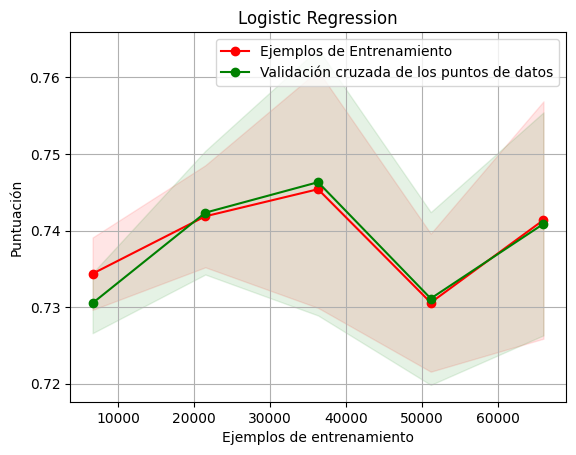

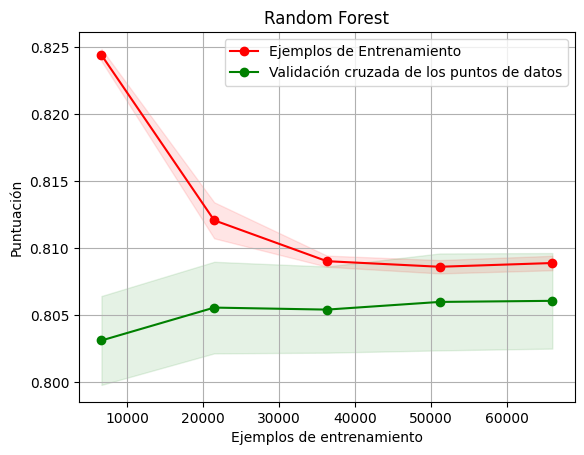

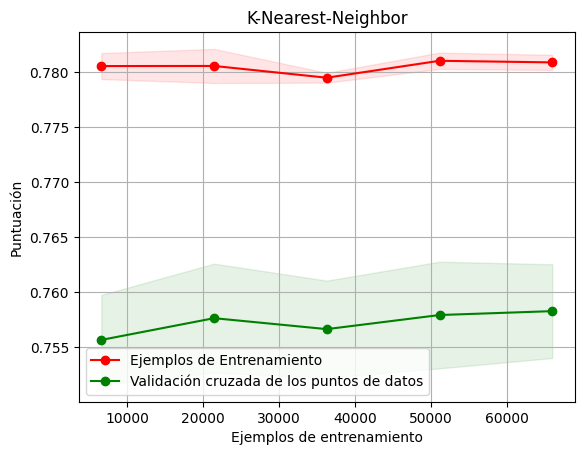

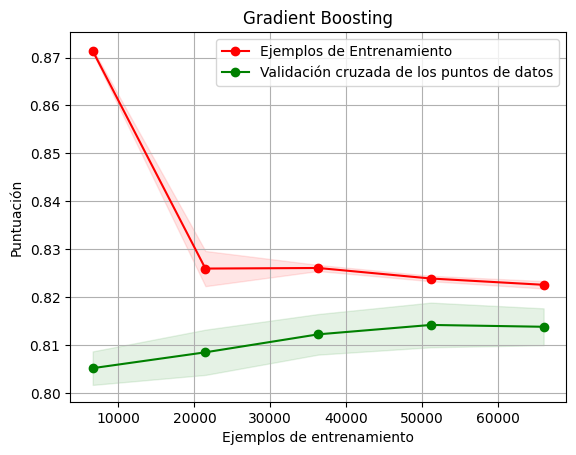

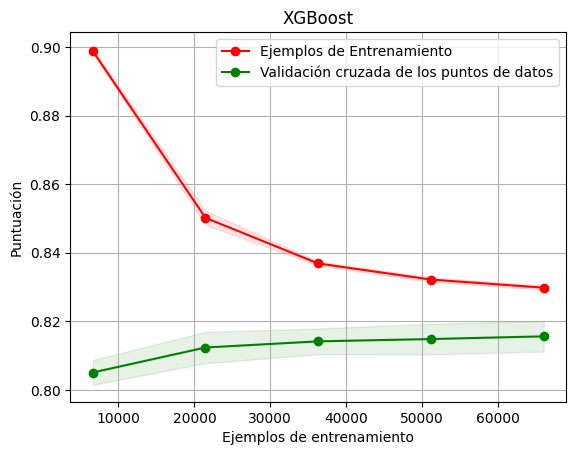

In [26]:
from sklearn.model_selection import learning_curve

learning_curve(logistic, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación cruzada de los puntos de datos")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logistic, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_RF, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)
     

## Probando las predicciones del modelo XGBoost

In [27]:
# Hacemos predicciones con el modelo
y_pred = model_XGB.predict(X_test)

# Transformamos las predicciones a las etiquetas originales
y_pred_originales = le.inverse_transform(y_pred)

In [28]:
y_pred_originales

array(['K', 'B', 'F', ..., 'K', 'G', 'A'], dtype=object)

In [33]:
Vmag = 9.93
BTmag = 11.1730
VTmag = 10.021000
B_V = 0.890
V_I = 0.90
Hpmag = 10.0926
V_I_red = 0.90
d = 51.572975
T = 4866.0967
M_v = 6.367889
M_Hip = 6.530489

# Seleccionar las mismas características que se utilizaron para entrenar el modelo
X_new = pd.DataFrame([[Vmag, BTmag, VTmag, B_V, V_I, Hpmag, V_I_red, d, T, M_v, M_Hip]], columns=['Vmag', 'BTmag', 'VTmag', 'B-V', 'V-I', 'Hpmag', '(V-I)red', 'd', 'T', 'M_v', 'M_Hip'])

# Aplicar la transformación a los nuevos datos con el mismo escalador utilizado para entrenar el modelo
X_new_minmax = minmax_scaler.transform(X_new)
X_new_standard = standard_scaler.transform(X_new)

# Utilizar el modelo para predecir la clasificación de la estrella
y_new = model_XGB.predict(X_new)

y_new = le.inverse_transform(y_new)

print("La clasificación de la estrella es:", y_new[0])


La clasificación de la estrella es: K


In [30]:
df

,Vmag,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral
0,8.13,8.9100,8.223000,0.635,0.70,8.2639,0.66,680.272100,5693.3335,-1.033413,-0.899513,6
1,8.46,8.8750,8.493000,0.362,0.42,8.5436,0.41,469.483580,6960.0654,0.101898,0.185498,6
2,8.85,9.1995,8.393071,0.954,0.94,9.0175,0.94,90.991810,4694.8870,4.054989,4.222488,6
3,2.21,1.9570,2.189000,-0.269,-0.22,2.1364,-0.22,429.184540,14328.8580,-5.953221,-6.026821,6
4,7.55,7.9140,7.589000,0.309,0.35,7.6252,0.47,540.540500,7274.2760,-1.114141,-1.038942,6
...,...,...,...,...,...,...,...,...,...,...,...,...
107529,6.84,6.7320,6.820000,-0.080,-0.06,6.8157,-0.06,311.526500,10878.9800,-0.627475,-0.651775,0
107544,9.44,10.0770,9.541000,0.542,0.62,9.5735,0.62,105.932205,6069.6514,4.314859,4.448360,0
107545,8.37,8.3880,8.364000,0.010,0.03,8.3813,0.03,411.522640,9760.0000,0.298032,0.309332,0
107546,7.87,8.3210,7.993000,0.302,0.35,7.9410,0.35,135.869570,7317.9087,2.204389,2.275389,0


<AxesSubplot: >

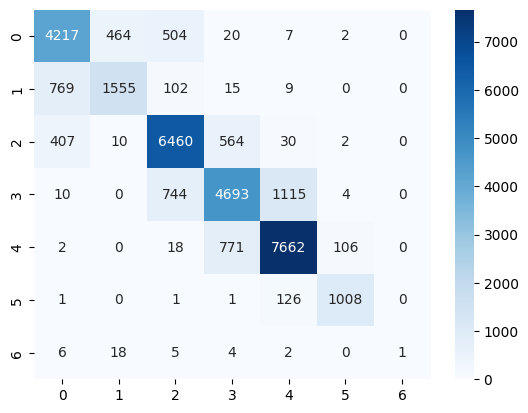

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

In [32]:
df

,Vmag,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral
0,8.13,8.9100,8.223000,0.635,0.70,8.2639,0.66,680.272100,5693.3335,-1.033413,-0.899513,6
1,8.46,8.8750,8.493000,0.362,0.42,8.5436,0.41,469.483580,6960.0654,0.101898,0.185498,6
2,8.85,9.1995,8.393071,0.954,0.94,9.0175,0.94,90.991810,4694.8870,4.054989,4.222488,6
3,2.21,1.9570,2.189000,-0.269,-0.22,2.1364,-0.22,429.184540,14328.8580,-5.953221,-6.026821,6
4,7.55,7.9140,7.589000,0.309,0.35,7.6252,0.47,540.540500,7274.2760,-1.114141,-1.038942,6
...,...,...,...,...,...,...,...,...,...,...,...,...
107529,6.84,6.7320,6.820000,-0.080,-0.06,6.8157,-0.06,311.526500,10878.9800,-0.627475,-0.651775,0
107544,9.44,10.0770,9.541000,0.542,0.62,9.5735,0.62,105.932205,6069.6514,4.314859,4.448360,0
107545,8.37,8.3880,8.364000,0.010,0.03,8.3813,0.03,411.522640,9760.0000,0.298032,0.309332,0
107546,7.87,8.3210,7.993000,0.302,0.35,7.9410,0.35,135.869570,7317.9087,2.204389,2.275389,0
